<a href="https://colab.research.google.com/github/Cherrymmu/AIFFEL_Online_Quest_Cherry/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/10_%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_%E1%84%91%E1%85%B3%E1%84%85%E1%85%A9%E1%84%8C%E1%85%A6%E1%86%A8%E1%84%90%E1%85%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 프로젝트

## 데이터 전처리

In [ ]:
# 라이브러리
import pandas as pd

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [ ]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [ ]:
# 데이터 샘플
display(train.head(5))
display(test.head(5))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246


In [ ]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [ ]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

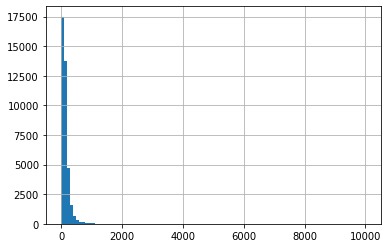

In [ ]:
# target(hist)
train['price'].hist(bins=100)

In [ ]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [ ]:
import numpy as np

In [ ]:
# 결측치 컬럼 삭제(last_review)
train = train.drop(['last_review'], axis=1)
test = test.drop(['last_review'], axis=1)

In [ ]:
print(display(train.head(5)))
print(display(test.head(5)))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,1,0


None


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,4.31,3,246


None


In [ ]:
# 결측치 채우기
train['name'].fillna('Unknown',inplace=True)
train['host_name'].fillna('Unknown',inplace=True)
train['reviews_per_month'].fillna(0, inplace=True)

test['name'].fillna('Unknown',inplace=True)
test['host_name'].fillna('Unknown',inplace=True)
test['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
# 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host

In [ ]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [ ]:
# 수치형 데이터 민맥스
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

cols = [
    'host_id',
    'latitude',
    'longitude',
    'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365'
]
# cols에 있는 각 수치형 컬럼에 민맥스 스케일
for col in cols:
    train[col] = scaler_train.fit_transform(train[[col]])
    test[col] = scaler_test.fit_transform(test[[col]])

train.head()
test.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",0.123103,Rémy,Brooklyn,Williamsburg,0.498818,0.563419,Private room,3,0.003350,0.31,0.000000,0.000000
1,971247,Sunny Artist Live/Work Apartment,0.019344,Larry,Manhattan,Upper West Side,0.705946,0.528529,Entire home/apt,3,0.266332,2.09,0.000000,0.668493
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,0.001153,Shell,Brooklyn,Clinton Hill,0.443716,0.532294,Entire home/apt,1,0.090452,0.65,0.009202,1.000000
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,0.007033,Yarden,Brooklyn,Clinton Hill,0.447091,0.537123,Entire home/apt,3,0.003350,0.13,0.000000,0.000000
4,13576581,Modern Central Park Apartment close to everything,0.285529,Bozhena,Manhattan,Harlem,0.735627,0.556916,Entire home/apt,1,0.268007,4.31,0.006135,0.673973


In [ ]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [ ]:
# 범주형 데이터 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

le_train = LabelEncoder()
le_test = LabelEncoder()

cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

# cols에 있는 각 범주형 컬럼에 레이블 인코딩
for col in cols:
    train[col] = le_train.fit_transform(train[col])
    test[col] = le_test.fit_transform(test[col])

# 레이블 인코딩이 잘 적용되었는지 확인
train.head()
test.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,"Cozy and Sunny Room Williamsburg, Luxury Building",0.123103,Rémy,1,187,0.498818,0.563419,1,3,0.003350,0.31,0.000000,0.000000
1,Sunny Artist Live/Work Apartment,0.019344,Larry,2,177,0.705946,0.528529,0,3,0.266332,2.09,0.000000,0.668493
2,Industrial Brooklyn Loft with Tree-Lined Windows,0.001153,Shell,1,35,0.443716,0.532294,0,1,0.090452,0.65,0.009202,1.000000
3,Spacious 2 bedroom in beautiful Clinton Hill,0.007033,Yarden,1,35,0.447091,0.537123,0,3,0.003350,0.13,0.000000,0.000000
4,Modern Central Park Apartment close to everything,0.285529,Bozhena,2,83,0.735627,0.556916,0,1,0.268007,4.31,0.006135,0.673973


In [ ]:
del_cols = ['name','host_name']
train = train.drop(del_cols, axis=1)
test = test.drop(del_cols, axis=1)

In [ ]:
print(train.shape, test.shape)
train.head()

(39116, 11) (9779, 11)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.343458,2,94,0.731742,0.539318,1,3,0.004769,0.09,0.003067,0.000000
1,0.178671,2,95,0.631633,0.478445,0,2,0.101749,1.68,0.003067,0.717808
2,0.001595,2,209,0.558041,0.449354,0,60,0.001590,0.20,0.000000,0.000000
3,0.013033,1,13,0.464162,0.579361,0,4,0.379968,2.89,0.003067,0.002740
4,0.045468,1,13,0.458611,0.543571,1,28,0.000000,0.00,0.000000,0.000000


## 머신러닝

4. 검증 데이터 분리
Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측

In [ ]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=20)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

In [ ]:
X_train.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
24961,0.114497,1,51,0.418640,0.573189,0,3,0.203498,3.10,0.000000,0.936986
38756,0.169440,1,91,0.567204,0.545340,0,1,0.020668,0.38,0.000000,0.000000
25925,0.110656,1,60,0.373943,0.552886,1,1,0.000000,0.00,0.000000,0.000000
4665,0.135820,0,147,0.909272,0.693732,1,2,0.001590,0.05,0.000000,0.000000
35740,0.669679,2,206,0.855605,0.593230,0,2,0.025437,1.80,0.009202,1.000000


In [ ]:
y_train.head()

24961     98
38756    130
25925     20
4665      87
35740    120
Name: price, dtype: int64

<AxesSubplot:>

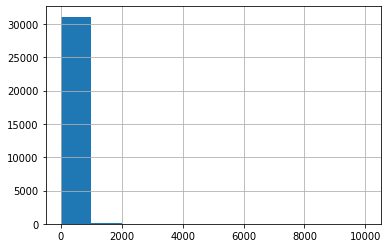

In [ ]:
# 타겟확인
y_train.hist()

In [ ]:
# 머신러닝(회귀)
# 선형 회귀

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mse = mean_squared_error(y_val, pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  67855.03982708286


In [ ]:
# 릿지회귀
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mse = mean_squared_error(y_val, pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  67855.39791236594


In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mse = mean_squared_error(y_val, pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  68128.80918089206


In [ ]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mse = mean_squared_error(y_val, pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  70491.37783367386


In [ ]:
# 랜덤포레스트 회귀
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mse = mean_squared_error(y_val, pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  67285.55366627044


In [ ]:
# xgboost 회귀
from xgboost import XGBRegressor
model = XGBRegressor(
    max_depth=10,
    learning_rate=0.04,
    n_estimators=500,
    random_state=20
)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mse = mean_squared_error(y_val, pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  65966.16934788709


In [ ]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
print('Mean Squared Error: ', mse)

Mean Squared Error:  65966.16934788709


In [ ]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
from sklearn.linear_model import Lasso

# 릿지 회귀 모델 생성, alpha 값을 크게 설정하여
model = Lasso(alpha=800000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)

print("나의 점수는 (MSE", mse, ")입니다.")

# AIFFEL Campus Online 7th Code Peer Review Templete

- 코더 : 홍채림



- [v] **1. 주어진 문제를 해결하는 완성된 코드가 제출되었나요?**
    - 문제에서 요구하는 최종 결과물이 첨부되었는지 확인
    - 문제를 해결하는 완성된 코드란 프로젝트 루브릭 3개 중 2개,
    퀘스트 문제 요구조건 등을 지칭
    >>1. Baseline을 참고하여 진행하였는가?	EDA(탐색적 데이터 분석), 데이터 전처리, 검증 데이터 분리 과정을 수행 하였는가?
    >>2. 머신러닝 지도학습(회귀) 모델을 잘 사용하였는가?	지도학습 회귀 모델을 3가지 이상 사용하여 MSE 결과를 확인해 보았는가?
    >>3. Baseline score(MSE 51,xxx) 보다 좋은 성능 향상을 하였는가?	Baseline score(MSE 51,xxx) 보다 좋은 성능을 보여준 회귀 모델은 무엇이며, MSE score는 몇 점인가?
      >>>Baseline 을 참고하면서 프로젝트를 진행하려 애썼다.
    
- [v]  **2. 전체 코드에서 가장 핵심적이거나 가장 복잡하고 이해하기 어려운 부분에 작성된
주석 또는 doc string을 보고 해당 코드가 잘 이해되었나요?**
    - 해당 코드 블럭에 doc string/annotation이 달려 있는지 확인
    - 해당 코드가 무슨 기능을 하는지, 왜 그렇게 짜여진건지, 작동 메커니즘이 뭔지 기술.
    - 주석을 보고 코드 이해가 잘 되었는지 확인
      >>> 주석을 달아서 코드가 무엇을 진행하고 있는지 알 수 있도록 해보았다.   
        
- [x]  **3. 에러가 난 부분을 디버깅하여 문제를 “해결한 기록을 남겼거나”
”새로운 시도 또는 추가 실험을 수행”해봤나요?**
    - 문제 원인 및 해결 과정을 잘 기록하였는지 확인 또는
    - 문제에서 요구하는 조건에 더해 추가적으로 수행한 나만의 시도,
    실험이 기록되어 있는지 확인
      >>> 에러가 난 부분을 남겨 놓지 않았다.
        
- [v]  **4. 회고를 잘 작성했나요?**
    - 주어진 문제를 해결하는 완성된 코드 내지 프로젝트 결과물에 대해
    배운점과 아쉬운점, 느낀점 등이 상세히 기록되어 있는지 확인
      >>> 현재 회고를 작성중이다.

- [..]  **5. 코드가 간결하고 효율적인가요?**
    - 파이썬 스타일 가이드 (PEP8) 를 준수하였는지 확인
    - 코드 중복을 최소화하고 범용적으로 사용할 수 있도록 모듈화(함수화) 했는지
      >>> 코드를 간결하게 쓰려고 노력했다.


      
---
### 회고

데이터 프레임을 다루는 것이 익숙하지 않아서 여러 EDA(전처리)하는 부분에서 아쉬웠다.
범주형 데이터를 원핫 인코딩으로 정리를 하는 것도 좋을 것 같고, 수치형데이터를 민맥스 조절 하였디만 여전히 수치 차이가 좀 큰 것 같아서 다음에는 조금 더 세밀한 조정을 해보는 것이 좋겠다는 결론을 내렸다.
